In [1]:
#import packages 
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
#import dataset 
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target #adding outcome variable : value 
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
# Separate features (X) and target variable (y)
x = df.drop(columns=['MedHouseVal'])
scaler = StandardScaler()
x = scaler.fit_transform(x)  #standardize X 
y = df['MedHouseVal']
# print(x.shape) (20640, 8)

In [9]:
#prediction function
def pred(x,w):
    return x @ w #matrix multiplication : np.dot(x, w) 
#initialize
r,c = x.shape[0], x.shape[1]
iters = 50000
alpha = 0.001 #learning rate
w = np.ones(c) #initialize weights as 1 or you can try zero : np.zeros(c)
loss_hist = np.zeros((0,2))

#Sanity check 
# print("x mean/std:", x.mean(), x.std())
# print("y mean/std:", y.mean(), y.std())
# print("Initial loss:", np.mean((y - pred(x, w)) ** 2) / 2)

In [10]:
for k in range(iters):
    y_pred = pred(x, w)              # prediction values

    # gradient descent update using the error
    gradient = x.T @ (y_pred - y) #derivatibe of MSE 
    w -= alpha * gradient / r  # or w -= alpha * grad, depending on sign convention

    # for every 100 iterations, compute loss
    if k % 100 == 0:
        y_diff = y - pred(x, w)
        loss = np.mean(y_diff ** 2) / 2
        loss_hist = np.vstack((loss_hist, [k, loss]))
        print("iter = %d loss = %f" % (k, loss))

print('initial loss : %f ' % loss_hist[0,1])
print('final loss : %f ' % loss_hist[-1,1])

iter = 0 loss = 5.499193
iter = 100 loss = 4.782777
iter = 200 loss = 4.262917
iter = 300 loss = 3.881839
iter = 400 loss = 3.599438
iter = 500 loss = 3.387747
iter = 600 loss = 3.227161
iter = 700 loss = 3.103855
iter = 800 loss = 3.008019
iter = 900 loss = 2.932633
iter = 1000 loss = 2.872637
iter = 1100 loss = 2.824352
iter = 1200 loss = 2.785073
iter = 1300 loss = 2.752795
iter = 1400 loss = 2.726015
iter = 1500 loss = 2.703593
iter = 1600 loss = 2.684660
iter = 1700 loss = 2.668541
iter = 1800 loss = 2.654710
iter = 1900 loss = 2.642753
iter = 2000 loss = 2.632338
iter = 2100 loss = 2.623204
iter = 2200 loss = 2.615135
iter = 2300 loss = 2.607959
iter = 2400 loss = 2.601533
iter = 2500 loss = 2.595742
iter = 2600 loss = 2.590489
iter = 2700 loss = 2.585694
iter = 2800 loss = 2.581290
iter = 2900 loss = 2.577223
iter = 3000 loss = 2.573445
iter = 3100 loss = 2.569918
iter = 3200 loss = 2.566608
iter = 3300 loss = 2.563487
iter = 3400 loss = 2.560532
iter = 3500 loss = 2.557723
iter

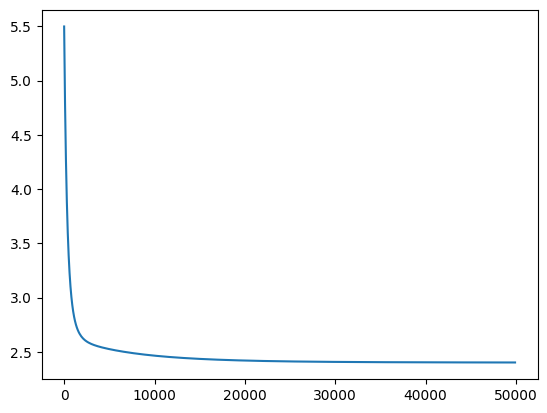

In [11]:
plt.plot(loss_hist[:,0],loss_hist[:,1])
plt.show() # loss curve: model converges quickly (Try different learning rate)